In [2]:
# !pip install pydub

In [1]:
import pickle
import numpy as np
import scipy.io.wavfile as wav
from pydub import AudioSegment
from matplotlib import pyplot as plt
from numpy.lib import stride_tricks

C:\Users\natas\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


# Get names of audio with duration > 15s

In [ ]:
# {'id': '1',
#  'name': 'ambos _noticiero-11-07-2022_409190.0-410910.0.wav',
#  'language': 'ambos',
#  'extension': 'wav',
#  'duration': '1 s',
#  'size': '148.19 KB'}

In [2]:
with open('Analysis/file_stats.pkl', 'rb') as f:
    data = pickle.load(f)

In [18]:
# datapath = '//wsl.localhost/Ubuntu/home/natasha/SLID/split_lang_id_audio/'
# count = 0
# t = 15*1000 #in milliseconds
# for dic in data:
#     if int(dic['duration'][:-2]) > 15:
#         audio = AudioSegment.from_wav(datapath+dic['name'])[:t]
#         audio.export(datapath+dic['name'], format="wav")

# Generate Spectrum

- link: https://dolby.io/blog/beginners-guide-to-visualizing-audio-as-a-spectogram-in-python/

- link: https://dsp.stackexchange.com/questions/72027/python-audio-analysis-which-spectrogram-should-i-use-and-why

- link: https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.signal.spectrogram.html

In [3]:
import os
import re
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

In [4]:
def generate_spectra(outpath, name, sample_rate, samples):
    powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(samples, Fs=sample_rate)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.savefig(outpath+name.replace('.wav', '.png'), bbox_inches="tight")

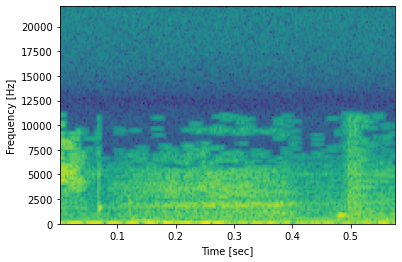

In [6]:
outpath = 'Spectrogram/'
datapath = '//wsl.localhost/Ubuntu/home/natasha/SLID/split_lang_id_audio/'

for dic in data[20680:]: 
    name = dic['name']
    name = re.sub(r'\n', '', name).strip()
    name = re.sub(r'\\', '', name).strip()
    sample_rate, samples = wavfile.read(datapath+name)
    try: 
        generate_spectra(outpath, name, sample_rate, samples)
    except:
        pass

# Create spectogram language mapping

In [2]:
import pickle
with open('Analysis/file_stats.pkl', 'rb') as f:
    data = pickle.load(f)

In [49]:
import os
def newest(path):
    files = os.listdir(path)
    paths = [os.path.join(path, basename.replace(' ', '')) for basename in files]
    return paths

In [50]:
loc = 'C:/Users/natas/Downloads/SLID/Segmentation_and_Language_Identification/Spectrogram'
paths = newest(loc)

In [51]:
paths[0]

'C:/Users/natas/Downloads/SLID/Segmentation_and_Language_Identification/Spectrogram\\ambos_noticiero-11-07-2022_409190.0-410910.0.png'

In [54]:
table = []
missing = []
for dic in data:
    audio_name = dic['name'][:-4]
    search = 'C:/Users/natas/Downloads/SLID/Segmentation_and_Language_Identification/Spectrogram\\' + audio_name + '.png'
    if search in paths:
        ind = paths.index(search)
        table.append([dic['id'], audio_name, dic['duration'], dic['language']])
    else:
        missing.append(audio_name)

In [61]:
table[0]

['0', 'ambo_noticiero-10-06-2022_144220.0-144970.0', '0 s', 'ambos']

In [63]:
write_file = 'Segmentation_and_Language_Identification/Analysis/missing_stats'
with open(write_file+'.pkl', 'wb') as file:
    pickle.dump(missing, file)
    
with open(write_file+'.txt', 'w') as file:
    file.write(str(missing))

In [62]:
import pandas as pd
columns = ['id', 'file_name', 'duration', 'language']
df = pd.DataFrame(table, columns=columns)
df.head(2)

,id,file_name,duration,language
0,0,ambo_noticiero-10-06-2022_144220.0-144970.0,0 s,ambos
1,2,ambos_noticiero-01-07-2022_1021570.0-1023940.0,2 s,ambos


In [64]:
csv_file_path = 'Segmentation_and_Language_Identification/RawData/raw_data.csv'
df.to_csv(csv_file_path, index=False)

## Get spectrogram bins

In [2]:
import librosa

In [6]:
# Load an audio file
audio_file_path = '//wsl.localhost/Ubuntu/home/natasha/SLID/split_lang_id_audio/ambos _noticiero-11-07-2022_409190.0-410910.0.wav'
audio_signal, sample_rate = librosa.load(audio_file_path, sr=None)

# Compute spectrogram
spectrogram = librosa.feature.melspectrogram(y=audio_signal, sr=sample_rate, n_fft=2048, hop_length=512)

# Number of frequency bins in each time step
num_frequency_bins = spectrogram.shape[0]
num_time_steps = spectrogram.shape[1]

print(f"Number of Time Steps: {num_time_steps}")
print(f"Number of Frequency Bins: {num_frequency_bins}")

Number of Time Steps: 149
Number of Frequency Bins: 128
